In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
pd.isnull(data).any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

0    284315
1       492
Name: Class, dtype: int64
577.8760162601626


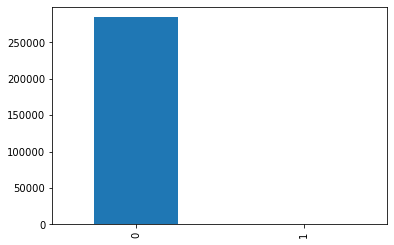

In [5]:
count_classes = pd.value_counts(data['Class'])
print(count_classes)
count_classes.plot(kind = 'bar')
print(count_classes[0]/count_classes[1])

In [6]:
from sklearn import preprocessing
for _ in list(data.columns):
    if _ != 'Class' and _ != 'Time':
        data[_] = preprocessing.StandardScaler().fit_transform(data[_].values.reshape(-1, 1))
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [12]:
from imblearn.over_sampling import SMOTE
x_whole=data.drop('Class',axis=1)
y_whole=data.Class
oversampler=SMOTE(random_state=0)
os_x,os_y = oversampler.fit_resample(x_whole,y_whole)
os_x=pd.DataFrame(os_x)
os_y=pd.Series(os_y)

os_count_classes = pd.value_counts(os_y)
print(os_count_classes)

0    284315
1    284315
Name: Class, dtype: int64


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(os_x,os_y,test_size = 0.3, random_state = 0)
print("训练集包含样本数量: ", len(x_train))
print("测试集包含样本数量: ", len(x_test))
print("样本总数: ", len(x_train)+len(x_test))

训练集包含样本数量:  398041
测试集包含样本数量:  170589
样本总数:  568630


212637    0
535831    1
182914    0
402648    1
80440     0
Name: Class, dtype: int64

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 
from sklearn.model_selection import cross_val_predict

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

def printing_Kfold_scores(x_train_data,y_train_data):
    """
    测试正则化参数
    """
    kf = KFold(n_splits=5, shuffle= True)
    C_param_range = [0.01,0.1,1,10,100] # 正则化参数
    results_table = pd.DataFrame(index = np.arange(0,len(C_param_range)), columns = ['C_param_range', 'Mean_recall_score'])
    results_table['C_param_range'] = C_param_range
    j = 0
    for c_param in C_param_range:
        print('-------------------------------------------')
        print('C_parameter：', c_param)
        print('-------------------------------------------')
        recall_accs = []
        #  k-fold 输出两个列表: train_index,test_index
        for train_index,test_index in kf.split(x_train_data):
            lr = LogisticRegression(C = c_param, penalty='l1',solver='liblinear')
            lr.fit(x_train_data.iloc[train_index,:],y_train_data.iloc[train_index].values.ravel())
            # 计算召回率并将其添加到当前c_parameter的召回率列表中
            y_pred_undersample = lr.predict(x_train_data.iloc[test_index,:].values)
            recall_acc = recall_score(y_train_data.iloc[test_index],y_pred_undersample)
            recall_accs.append(recall_acc)
            print("recall = ", recall_acc)
        results_table.loc[j,'Mean_recall_score'] = np.mean(recall_accs)
        j+=1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
    best_c = results_table.loc[results_table['Mean_recall_score'].map(float).idxmax()]['C_param_range']
    print('*********************************************************************************')
    print('交叉验证的最佳模型的参数为 = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [76]:
best_c = printing_Kfold_scores(x_train,y_train)

-------------------------------------------
C_parameter： 0.01
-------------------------------------------


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.913259820468582


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9125557169329394


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9120621390563135


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9107389806643031


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9133941891926063

Mean recall score  0.9124021692629487

-------------------------------------------
C_parameter： 0.1
-------------------------------------------


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9137514471233704


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9147501383926325


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9138004459029535


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9159048436789737


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9126675855155996

Mean recall score  0.9141748921227059

-------------------------------------------
C_parameter： 1
-------------------------------------------


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9149589396700197


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9139434377132459


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9165890145314428


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9137970066658282


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9129025775008792

Mean recall score  0.9144381952162831

-------------------------------------------
C_parameter： 10
-------------------------------------------


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.912946707679996


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9134818465251936


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9135671271696777


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9175443876015649


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9157293475252258

Mean recall score  0.9146538833003316

-------------------------------------------
C_parameter： 100
-------------------------------------------


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9146893223406395


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.912001206151372


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9143106893106893


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


recall =  0.9153342931474325
recall =  0.9157658679164462

Mean recall score  0.914420275773316

*********************************************************************************
交叉验证的最佳模型的参数为 =  10.0
*********************************************************************************


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [77]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    绘制混淆矩阵
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

召回率:  0.9120081482608848


D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


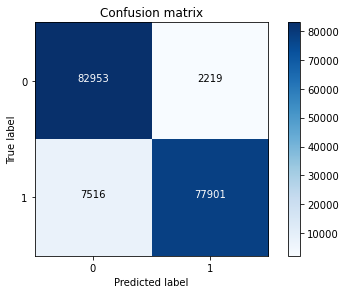

In [82]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(x_train,y_train.values.ravel())
y_pred= lr.predict(x_test.values)

# 计算所需值
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘制
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

D:\code\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


给定阈值为: 0.1 时测试集召回率:  0.9869580996757086
给定阈值为: 0.2 时测试集召回率:  0.9654167203249938
给定阈值为: 0.3 时测试集召回率:  0.9453738717117202
给定阈值为: 0.4 时测试集召回率:  0.9282695482163972
给定阈值为: 0.5 时测试集召回率:  0.9102871793671049
给定阈值为: 0.6 时测试集召回率:  0.901576969455729
给定阈值为: 0.7 时测试集召回率:  0.8915555451490921
给定阈值为: 0.8 时测试集召回率:  0.882201435311472
给定阈值为: 0.9 时测试集召回率:  0.8672980788367655


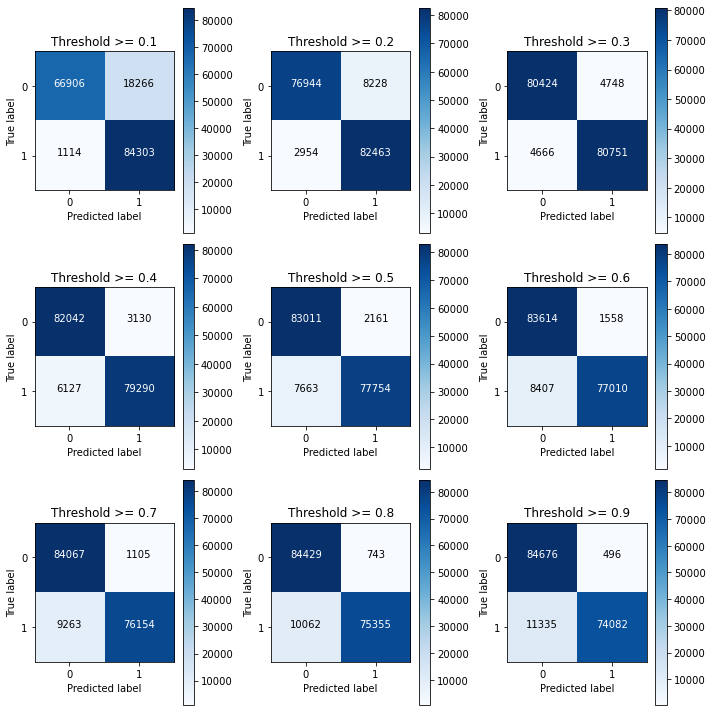

In [83]:
# 用之前最好的参数来进行建模
lr = LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear')

# 训练模型，还是用下采样的数据集
lr.fit(x_train,y_train.values.ravel())

# 得到预测结果的概率值
y_pred_undersample_proba = lr.predict_proba(x_test.values)

#指定不同的阈值
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1

# 用混淆矩阵来进行展示
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("给定阈值为:",i,"时测试集召回率: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 